# Text Analysis Using `nltk.text`

## 1. Tokenization

Before working with any text, we first need to **tokenize** it by splitting it into smaller, meaningful units (usually words) called **tokens**.

In [1]:
from nltk.tokenize import word_tokenize
from nltk.text import Text

In [2]:
lyrics_string = ''' Two plus two is four, minus one that's three — quick maths.
                    Every day man's on the block. Smoke trees.
                    See your girl in the park. That girl is an uckers.
                    When the thing went quack quack quack, your men were ducking!
                    Hold tight, Asznee, my brother. He's got a pumpy.
                    Hold tight, my man, my guy. He's got a frisbee.'''
tokens = word_tokenize(lyrics_string)
tokens = [word.lower() for word in tokens]
tokens[:5]

['two', 'plus', 'two', 'is', 'four']

NLTK provides several other tokenizers apart from `word_tokenize`, such as `WhitespaceTokenizer`, which is similar to Python’s `string.split()`, and `BlanklineTokenizer`. We will see a few others in the next notebooks as well.

## 2. Analysis

In [3]:
t = Text(tokens)
t

<Text: two plus two is four , minus one...>

In [4]:
t.index('two')

0

In [5]:
t.count('quack')

3

We can use the `concordance()` method of the `Text` class to display the **context window** for a given input of words. The default width is 79 characters.

In [6]:
t.concordance('uckers')

Displaying 1 of 1 matches:
 girl in the park . that girl is an uckers . when the thing went quack quack q


`collocations()` identifies **collocations**—words that often appear consecutively.

In [7]:
t.collocations()

hold tight; quack quack


`similar()` finds other words that appear in the same contexts as the specified word (**distributional similarity**), listing the most similar words first.

In [8]:
t.similar('brother')

guy


A **dispersion plot** reveals patterns in word positions. Each stripe represents an instance of a word, and each row represents the entire text.

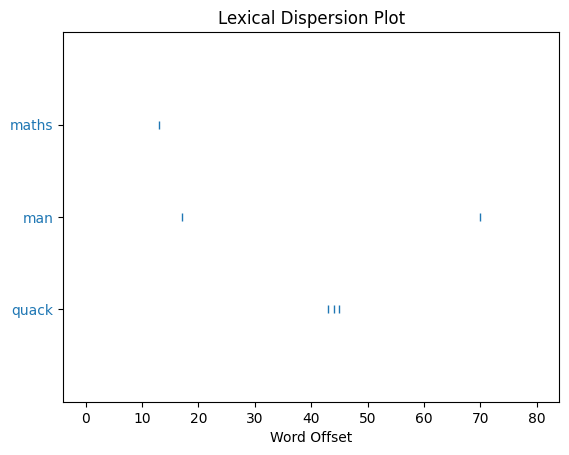

In [9]:
t.dispersion_plot(['maths', 'man', 'quack'])

In [10]:
t.vocab()

FreqDist({'.': 9, ',': 6, "'s": 4, 'the': 3, 'quack': 3, 'my': 3, 'two': 2, 'is': 2, 'that': 2, 'man': 2, ...})

`plot()` plots the 20 most common tokens.

<Axes: xlabel='Samples', ylabel='Counts'>

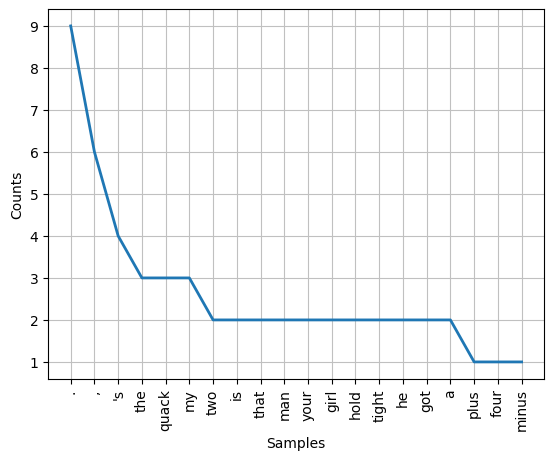

In [11]:
t.plot(20)

Another thing that might be useful in analysis is finding **common contexts**. Our text is too short, so we will use a longer one.

NLTK comes with many interesting **corpora**, which are large collections of text. You can check out what corpora are found in `nltk.corpus` in [Chapter 2, Section 1 of the NLTK Book](http://www.nltk.org/book/ch02.html). Actually, `nltk.corpus` contains **corpus readers**, which provide various methods to access each corpus.

`reuters` is a corpus of news documents. `words()` is one method corpus readers provide for reading data from a corpus. We will learn more about these methods in Section 2 of [Notebook 2.2](2-2-Detecting-Text-Language-by-Counting-Stop-Words.ipynb). For now, we will use `words()` to read the corpus and then run `common_contexts()`, which takes a list of words and displays where they are used similarly. The underscores in the output indicate where the words would be in the text.

In [12]:
from nltk.corpus import reuters

text = Text(reuters.words())
text.common_contexts(['June', 'August'])

in_, in_. begins_1 in_1986 and_, in_and last_, -_, on_26 early_,
/_shipment for_shipment -_. ,_, for_, and_. last_. in_the of_. on_12


We will further explore the Reuters corpus as well as several others in later chapters.